In [8]:
# %load_ext autoreload
# %autoreload 2

# Experiments with WMF model

In [9]:
from pathlib import Path
import numpy as np

import teaser.util as util
import teaser.evaluation as evaluation

from teaser.algorithm.baseline.wmf import WMF

## Datasets

In [10]:
## Uncomment corresponding directory.
# DATA_DIR = Path('../../data/ML20M/')
# DATA_DIR = Path('../../data/Amazon Video Games/')
DATA_DIR = Path('../../data/Publiq/')

In [11]:
# Shouldn't need to change this info
INTERACTIONS_TRAIN_PATH = DATA_DIR / 'interactions.train.csv'
INTERACTIONS_VALIN_PATH = DATA_DIR / 'interactions.valin.csv'
INTERACTIONS_VALOUT_PATH = DATA_DIR / 'interactions.valout.csv'
INTERACTIONS_TESTIN_PATH = DATA_DIR / 'interactions.testin.csv'
INTERACTIONS_TESTOUT_PATH = DATA_DIR / 'interactions.testout.csv'

METADATA_PATH = DATA_DIR / 'features.csv'

ITEM_ID = 'itemId'
USER_ID = 'userId'

## Define algorithm and hyperparameter ranges

In [12]:
ALG = WMF

# L2 = [10 ** p for p in range(1, 5)]
# ALPHA = [10 ** p for p in range(0, 4)]
L2 = [50, 100, 200, 500]
ALPHA = [100, 150]
T = [300]
MAX_ITER = 20
HYPERPARAMS = {'l2': L2, 'alpha': ALPHA, 'max_iterations': MAX_ITER, 't': T}
HYPERPARAMS

{'l2': [50, 100, 200, 500],
 'alpha': [100, 150],
 'max_iterations': 20,
 't': [300]}

## Parse data

In [6]:
S, tags = util.parse_metadata(METADATA_PATH, item_id=ITEM_ID)
n, t = S.shape  # amount of items and tags
# HYPERPARAMS['t'] = t
del S, tags

X = util.parse_interactions(INTERACTIONS_TRAIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

Xval_in = util.parse_interactions(INTERACTIONS_VALIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xval_out = util.parse_interactions(INTERACTIONS_VALOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_in = util.parse_interactions(INTERACTIONS_TESTIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_out = util.parse_interactions(INTERACTIONS_TESTOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

In [7]:
# # debug
# d_items = 1000
# S = S[:d_items,:]
# tags = tags[:d_items]
# X = X[:,:d_items]
# Xval_in = Xval_in[:,:d_items]
# Xval_out = Xval_out[:,:d_items]
# Xtest_in = Xtest_in[:,:d_items]
# Xtest_out = Xtest_out[:,:d_items]

## Perform gridsearch on validation set

In [8]:
score, best_hyperparams = evaluation.gridsearch(ALG, X, None, Xval_in, Xval_out, HYPERPARAMS)

Training model WMF with hyperparameters {'l2': 50, 'alpha': 50, 'max_iterations': 20, 't': 100}



Evaluating with 2000 users
Average Recall@20 0.193
Average Recall@100 0.405
Average nDCG@100 0.136
Training model WMF with hyperparameters {'l2': 100, 'alpha': 50, 'max_iterations': 20, 't': 100}



Evaluating with 2000 users
Average Recall@20 0.197
Average Recall@100 0.408
Average nDCG@100 0.137
Training model WMF with hyperparameters {'l2': 150, 'alpha': 50, 'max_iterations': 20, 't': 100}



Evaluating with 2000 users
Average Recall@20 0.198
Average Recall@100 0.405
Average nDCG@100 0.137
Training model WMF with hyperparameters {'l2': 200, 'alpha': 50, 'max_iterations': 20, 't': 100}



Evaluating with 2000 users
Average Recall@20 0.192
Average Recall@100 0.402
Average nDCG@100 0.135
Training model WMF with hyperparameters {'l2': 50, 'alpha': 100, 'max_iterations': 20, 't': 100}



Evaluating with 2000 users
Average Recall@20 0.186
Average Recall@100 0.402
Average nDCG@100 0.133
Training model WMF with hyperparameters {'l2': 100, 'alpha': 100, 'max_iterations': 20, 't': 100}



Evaluating with 2000 users
Average Recall@20 0.19
Average Recall@100 0.413
Average nDCG@100 0.139
Training model WMF with hyperparameters {'l2': 150, 'alpha': 100, 'max_iterations': 20, 't': 100}



Evaluating with 2000 users
Average Recall@20 0.196
Average Recall@100 0.412
Average nDCG@100 0.135
Training model WMF with hyperparameters {'l2': 200, 'alpha': 100, 'max_iterations': 20, 't': 100}



Evaluating with 2000 users
Average Recall@20 0.192
Average Recall@100 0.404
Average nDCG@100 0.136
Training model WMF with hyperparameters {'l2': 50, 'alpha': 150, 'max_iterations': 20, 't': 100}



Evaluating with 2000 users
Average Recall@20 0.181
Average Recall@100 0.398
Average nDCG@100 0.127
Training model WMF with hyperparameters {'l2': 100, 'alpha': 150, 'max_iterations': 20, 't': 100}



Evaluating with 2000 users
Average Recall@20 0.189
Average Recall@100 0.405
Average nDCG@100 0.132
Training model WMF with hyperparameters {'l2': 150, 'alpha': 150, 'max_iterations': 20, 't': 100}



Evaluating with 2000 users
Average Recall@20 0.191
Average Recall@100 0.409
Average nDCG@100 0.132
Training model WMF with hyperparameters {'l2': 200, 'alpha': 150, 'max_iterations': 20, 't': 100}



Evaluating with 2000 users
Average Recall@20 0.195
Average Recall@100 0.413
Average nDCG@100 0.134
Training model WMF with hyperparameters {'l2': 50, 'alpha': 50, 'max_iterations': 20, 't': 200}



Evaluating with 2000 users
Average Recall@20 0.203
Average Recall@100 0.41
Average nDCG@100 0.14
Training model WMF with hyperparameters {'l2': 100, 'alpha': 50, 'max_iterations': 20, 't': 200}



Evaluating with 2000 users
Average Recall@20 0.206
Average Recall@100 0.414
Average nDCG@100 0.143
Training model WMF with hyperparameters {'l2': 150, 'alpha': 50, 'max_iterations': 20, 't': 200}



Evaluating with 2000 users
Average Recall@20 0.205
Average Recall@100 0.412
Average nDCG@100 0.141
Training model WMF with hyperparameters {'l2': 200, 'alpha': 50, 'max_iterations': 20, 't': 200}



Evaluating with 2000 users
Average Recall@20 0.2
Average Recall@100 0.407
Average nDCG@100 0.139
Training model WMF with hyperparameters {'l2': 50, 'alpha': 100, 'max_iterations': 20, 't': 200}



Evaluating with 2000 users
Average Recall@20 0.198
Average Recall@100 0.395
Average nDCG@100 0.133
Training model WMF with hyperparameters {'l2': 100, 'alpha': 100, 'max_iterations': 20, 't': 200}



Evaluating with 2000 users
Average Recall@20 0.194
Average Recall@100 0.4
Average nDCG@100 0.137
Training model WMF with hyperparameters {'l2': 150, 'alpha': 100, 'max_iterations': 20, 't': 200}



Evaluating with 2000 users
Average Recall@20 0.204
Average Recall@100 0.412
Average nDCG@100 0.141
Training model WMF with hyperparameters {'l2': 200, 'alpha': 100, 'max_iterations': 20, 't': 200}



Evaluating with 2000 users
Average Recall@20 0.205
Average Recall@100 0.424
Average nDCG@100 0.143
Training model WMF with hyperparameters {'l2': 50, 'alpha': 150, 'max_iterations': 20, 't': 200}



Evaluating with 2000 users
Average Recall@20 0.19
Average Recall@100 0.391
Average nDCG@100 0.131
Training model WMF with hyperparameters {'l2': 100, 'alpha': 150, 'max_iterations': 20, 't': 200}



Evaluating with 2000 users
Average Recall@20 0.2
Average Recall@100 0.403
Average nDCG@100 0.138
Training model WMF with hyperparameters {'l2': 150, 'alpha': 150, 'max_iterations': 20, 't': 200}



Evaluating with 2000 users
Average Recall@20 0.2
Average Recall@100 0.412
Average nDCG@100 0.138
Training model WMF with hyperparameters {'l2': 200, 'alpha': 150, 'max_iterations': 20, 't': 200}



Evaluating with 2000 users
Average Recall@20 0.201
Average Recall@100 0.421
Average nDCG@100 0.14
Training model WMF with hyperparameters {'l2': 50, 'alpha': 50, 'max_iterations': 20, 't': 300}



Evaluating with 2000 users
Average Recall@20 0.204
Average Recall@100 0.388
Average nDCG@100 0.136
Training model WMF with hyperparameters {'l2': 100, 'alpha': 50, 'max_iterations': 20, 't': 300}



Evaluating with 2000 users
Average Recall@20 0.21
Average Recall@100 0.406
Average nDCG@100 0.141
Training model WMF with hyperparameters {'l2': 150, 'alpha': 50, 'max_iterations': 20, 't': 300}



Evaluating with 2000 users
Average Recall@20 0.21
Average Recall@100 0.419
Average nDCG@100 0.144
Training model WMF with hyperparameters {'l2': 200, 'alpha': 50, 'max_iterations': 20, 't': 300}



Evaluating with 2000 users
Average Recall@20 0.199
Average Recall@100 0.408
Average nDCG@100 0.139
Training model WMF with hyperparameters {'l2': 50, 'alpha': 100, 'max_iterations': 20, 't': 300}



Evaluating with 2000 users
Average Recall@20 0.188
Average Recall@100 0.387
Average nDCG@100 0.133
Training model WMF with hyperparameters {'l2': 100, 'alpha': 100, 'max_iterations': 20, 't': 300}



Evaluating with 2000 users
Average Recall@20 0.202
Average Recall@100 0.405
Average nDCG@100 0.138
Training model WMF with hyperparameters {'l2': 150, 'alpha': 100, 'max_iterations': 20, 't': 300}



Evaluating with 2000 users
Average Recall@20 0.208
Average Recall@100 0.418
Average nDCG@100 0.143
Training model WMF with hyperparameters {'l2': 200, 'alpha': 100, 'max_iterations': 20, 't': 300}



Evaluating with 2000 users
Average Recall@20 0.209
Average Recall@100 0.423
Average nDCG@100 0.144
Training model WMF with hyperparameters {'l2': 50, 'alpha': 150, 'max_iterations': 20, 't': 300}



Evaluating with 2000 users
Average Recall@20 0.188
Average Recall@100 0.366
Average nDCG@100 0.127
Training model WMF with hyperparameters {'l2': 100, 'alpha': 150, 'max_iterations': 20, 't': 300}



Evaluating with 2000 users
Average Recall@20 0.194
Average Recall@100 0.393
Average nDCG@100 0.135
Training model WMF with hyperparameters {'l2': 150, 'alpha': 150, 'max_iterations': 20, 't': 300}



Evaluating with 2000 users
Average Recall@20 0.2
Average Recall@100 0.408
Average nDCG@100 0.139
Training model WMF with hyperparameters {'l2': 200, 'alpha': 150, 'max_iterations': 20, 't': 300}



Evaluating with 2000 users
Average Recall@20 0.203
Average Recall@100 0.416
Average nDCG@100 0.14



In [9]:
f"Best score of {score} achieved with {best_hyperparams}."

"Best score of 0.14444164663821188 achieved with {'l2': 200, 'alpha': 100, 'max_iterations': 20, 't': 300}."

## Evaluate model with optimal hyperparams on test set

In [10]:
%%time
alg = ALG(**best_hyperparams)
alg.fit(X)


CPU times: user 43.6 s, sys: 2.76 s, total: 46.3 s
Wall time: 3.48 s


In [11]:
%%time
print("Performance on test set")
score = evaluation.eval(alg, Xtest_in, Xtest_out)

Performance on test set



Evaluating with 2000 users
Average Recall@20 0.226
Average Recall@100 0.433
Average nDCG@100 0.157
CPU times: user 8.27 s, sys: 94.1 ms, total: 8.36 s
Wall time: 4.53 s


## Plot amount of items from long tail recommended

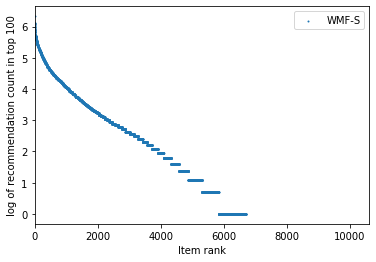

In [12]:
# evaluation.plot_long_tail(alg, Xtest_in=Xtest_in, Xtest_out=Xtest_out, labels=["EASE", "Test items"], k=100)
evaluation.plot_long_tail(alg, histories=Xtest_in, labels=["WMF"], k=100)